# <b> <span style='color:#0386f7de'>|</span> Abstract</b>

### The objective of this Notebook is to predict `SleepTime` using all the Personal Key Indicators of the Human Beings with HeartDisease information.
* Dataset: Personal key indicators of HeartDisease.
* Dataset has 319795 observations and 18 features [14 Categorical features and 4 Continuous Features] with just 27,373 (8.5%) HeartDisease (Target) observations.

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `AgeCategory`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`,  `SleepTime`

In [ ]:
# Importing Required Libraries
# Install Numpy, Pandas, Matplotlib, Seaborn, Plotly, Category_encoders

# For Data Manipulation
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split 

# For ML models
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [ ]:
# Dataset Link
data_githublink = "https://github.com/jkkn31/KrishnakanthNaik/blob/main/heart_2020_cleaned.csv"

# Transforming above link to access data from above provided github link
data_githublink= data_githublink.replace("blob/", "").replace("github.com","raw.githubusercontent.com")
data_githublink

# Loading the dataset.
raw_df = pd.read_csv(data_githublink)
df = raw_df.copy()
df.rename(columns={'BMI':'BMI_value'}, inplace=True)
df.head()

,HeartDisease,BMI_value,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Dataset has `319795` observations and `18` features [14 Categorical features and 4 Continuous Features].


## Column Descriptions
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: 13-categories of age. [ '18-24',  '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

### Trying to predict the `SleepTime` using the above features.

In [ ]:
# checking the details (missing values, dtypes) of all the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI_value         319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Checking Missing/null values in the dataset.
df.isnull().sum()

HeartDisease        0
BMI_value           0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

* There are `no missing values` in the dataset, so Imputation methods are not required.

In [ ]:
print(f"Target Distribution --> \n{100*df.SleepTime.value_counts(normalize=True)}")

Target Distribution --> 
7.0     30.566769
8.0     30.520177
6.0     20.863678
5.0      5.998843
9.0      5.016026
10.0     2.437812
4.0      2.423428
12.0     0.689504
3.0      0.622899
2.0      0.246408
1.0      0.172298
11.0     0.129771
14.0     0.075986
16.0     0.073797
15.0     0.059100
18.0     0.031895
13.0     0.030332
20.0     0.020013
24.0     0.009381
17.0     0.006567
22.0     0.002814
19.0     0.000938
23.0     0.000938
21.0     0.000625
Name: SleepTime, dtype: float64


### Dataset has Outliers, Lets check them and handle it.

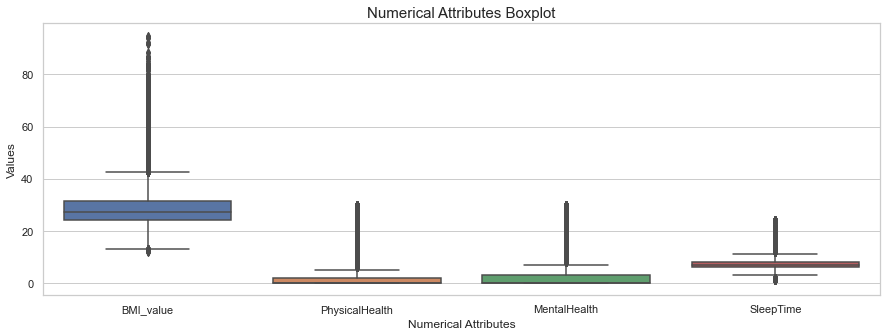

In [ ]:
# Listing numerical and categorical features from our dataset.
numerical_feats = df.select_dtypes(include='number').columns.tolist()
categorical_feats = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_feats])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

In [ ]:
# Lets divide BMI into Class based on below limits for each class.
def BMI_Classification(BMI):
    if(BMI < 18.5): return 'UnderWeight'
    elif(18.5 <= BMI <= 25): return 'NormalWeight'
    elif(25 <= BMI <= 30): return 'OverWeight'
    elif(30 <= BMI <= 35): return 'Obesity Class I'
    elif(35 <= BMI <= 40): return 'Obesity Class II'
    elif(40 <= BMI): return 'Obesity Class III'
    else: return None
    
from pandas.api.types import CategoricalDtype

df['BMI'] = df['BMI_value'].apply(lambda x: BMI_Classification(x))

list_ordering = ["UnderWeight", 'NormalWeight', 'OverWeight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']  
order_type = CategoricalDtype(categories=list_ordering, ordered=True)
df["BMI"] = df["BMI"].astype(order_type)   
df = df.drop("BMI_value", axis=1)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,No,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,UnderWeight
1,No,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NormalWeight
2,No,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,OverWeight
3,No,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,NormalWeight
4,No,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NormalWeight


75% of the people has sleepTime less than or equal to 8 hours and top 25% people SleepTime seems to be potential outlier , lets calculate the Interquantile range to impute the outliers.

In [ ]:
def remove_oultliers_using_quantiles(df, feature,factor):
    Q1 = df[f"{feature}"].quantile(0.25)
    Q3 = df[f"{feature}"].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-factor*IQR
    upper_limit=Q3+factor*IQR
#     print(df[feature].describe())
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
#     print(df[feature].describe())
    return df

In [ ]:
df = remove_oultliers_using_quantiles(df, 'PhysicalHealth', 1.5)
df = remove_oultliers_using_quantiles(df, 'SleepTime', 1.5)
df = remove_oultliers_using_quantiles(df, 'MentalHealth', 1.5)
df.SleepTime.describe()

count    319795.000000
mean          7.058994
std           1.228426
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: SleepTime, dtype: float64

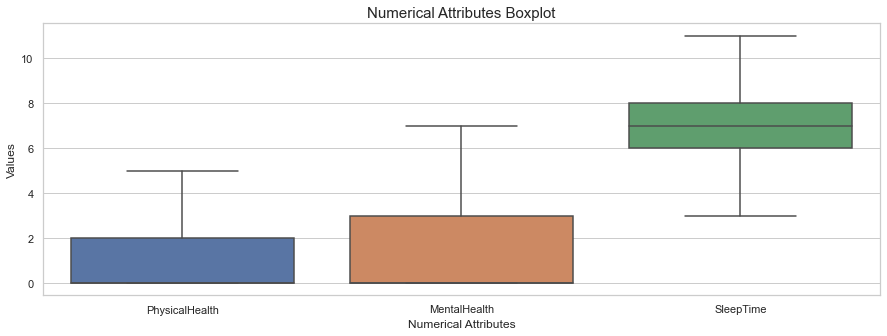

In [ ]:
# Listing numerical and categorical features from our dataset.
numerical_feats = df.select_dtypes(include='number').columns.tolist()
categorical_feats = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_feats])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

### Standardize the Dataset.

In [ ]:
numerical_feats

['PhysicalHealth', 'MentalHealth', 'SleepTime']

In [ ]:
# Using MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_feats] = pd.DataFrame(scaler.fit_transform(df[numerical_feats].values), columns=numerical_feats, index=df.index)

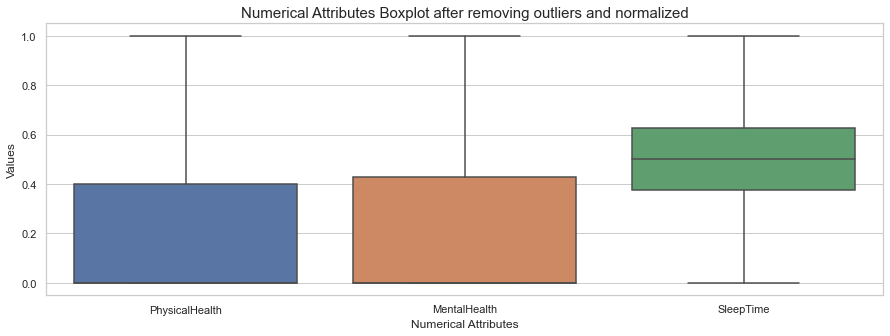

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_feats])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers and normalized", fontsize= 15)
plt.show()

### Lets Transform the data

In [ ]:
t_df = df.copy()

t_df = pd.get_dummies(t_df, columns=['Sex'], prefix='Is' , drop_first=True)
# Mapping all the binary features with 1 and 0


numerical_feats = t_df.select_dtypes(include='number').columns.tolist()
categorical_feats = t_df.select_dtypes(include='object').columns.tolist()

t_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,No,Yes,No,No,0.600000,0.556909,No,55-59,White,Yes,Yes,Very good,0.250,Yes,No,Yes,UnderWeight,0
1,No,No,No,Yes,0.000000,0.000000,No,80 or older,White,No,Yes,Very good,0.500,No,No,No,NormalWeight,0
2,No,Yes,No,No,0.674342,0.556909,No,65-69,White,Yes,Yes,Fair,0.625,Yes,No,No,OverWeight,1
3,No,No,No,No,0.000000,0.000000,No,75-79,White,No,No,Good,0.375,No,No,Yes,NormalWeight,0
4,No,No,No,No,0.674342,0.000000,Yes,40-44,White,No,Yes,Very good,0.625,No,No,No,NormalWeight,0


In [ ]:
# Listing down features with binary values and multiple values.
ordinal_feat = []
binary_feat = []

[ ordinal_feat.append(i) for i in categorical_feats if t_df[i].nunique()>2]
[ binary_feat.append(i) for i in categorical_feats if t_df[i].nunique()<=2]

    
for col in binary_feat:
    t_df[col] = t_df[col].str.upper().apply(lambda x: 1 if x =='YES' else 0)

In [ ]:
#Ordinal encoding for order variableslike AgeCategory, GenHealth, BMI

age_encoder= ce.OrdinalEncoder(cols=['AgeCategory'],return_df=True,
                               mapping=[{'col':'AgeCategory',
                              'mapping':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}])


health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], return_df=True, mapping=[{'col':'GenHealth',
 'mapping':{'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}}])

BMI_encoder = ce.OrdinalEncoder(cols=['BMI'], return_df=True, mapping=[{'col':'BMI','mapping':{'UnderWeight':0,'NormalWeight':1,'OverWeight':2,'Obesity Class I':3,'Obesity Class II':4, 'Obesity Class III':5}}])

t_df['AgeCategory'] = age_encoder.fit_transform(t_df['AgeCategory'])
t_df['GenHealth'] = health_encoder.fit_transform(t_df['GenHealth'])
t_df['BMI'] = BMI_encoder.fit_transform(t_df['BMI'])

t_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,0,1,0,0,0.600000,0.556909,0,7,White,Yes,1,3,0.250,1,0,1,0,0
1,0,0,0,1,0.000000,0.000000,0,12,White,No,1,3,0.500,0,0,0,1,0
2,0,1,0,0,0.674342,0.556909,0,9,White,Yes,1,1,0.625,1,0,0,2,1
3,0,0,0,0,0.000000,0.000000,0,11,White,No,0,2,0.375,0,0,1,1,0
4,0,0,0,0,0.674342,0.000000,1,4,White,No,1,3,0.625,0,0,0,1,0


* Why I have used Ordinal Encoder for Age, Health, BMI? 
    * I have categories in each feature which have ordered relationship between each categories, so OrdinalEncoder does that job by using given ordered map
     
* Why OneHot Encoder for Race and Diabetic?
    * As my feature values do not have any order among each other and few categories have high impact on identifying heart Disease like Diabetic-YES, White Race adults have high rate of HeartDisease... One hot encoder creates new features using feature categories and they have binary values in each feature which helps in identifying direct impact on Target but only issue with oneHotEncoder is it increase the number of features.  [OneHotEncoder is not Recommender for High Cardinal Features and Ordinal Features as high cardinality increases Total number of features in the dataset]

In [ ]:
# # One Hot Encoding for vaiables with multiple values like Race, Diabetic

encoder_race=ce.OneHotEncoder(cols='Race',handle_unknown='return_nan',return_df=True,use_cat_names=True)
encoder_diabetic = ce.OneHotEncoder(cols='Diabetic', handle_unknown='return_nan', return_df=True, use_cat_names=True)

t_df = encoder_race.fit_transform(t_df)
t_df = encoder_diabetic.fit_transform(t_df)

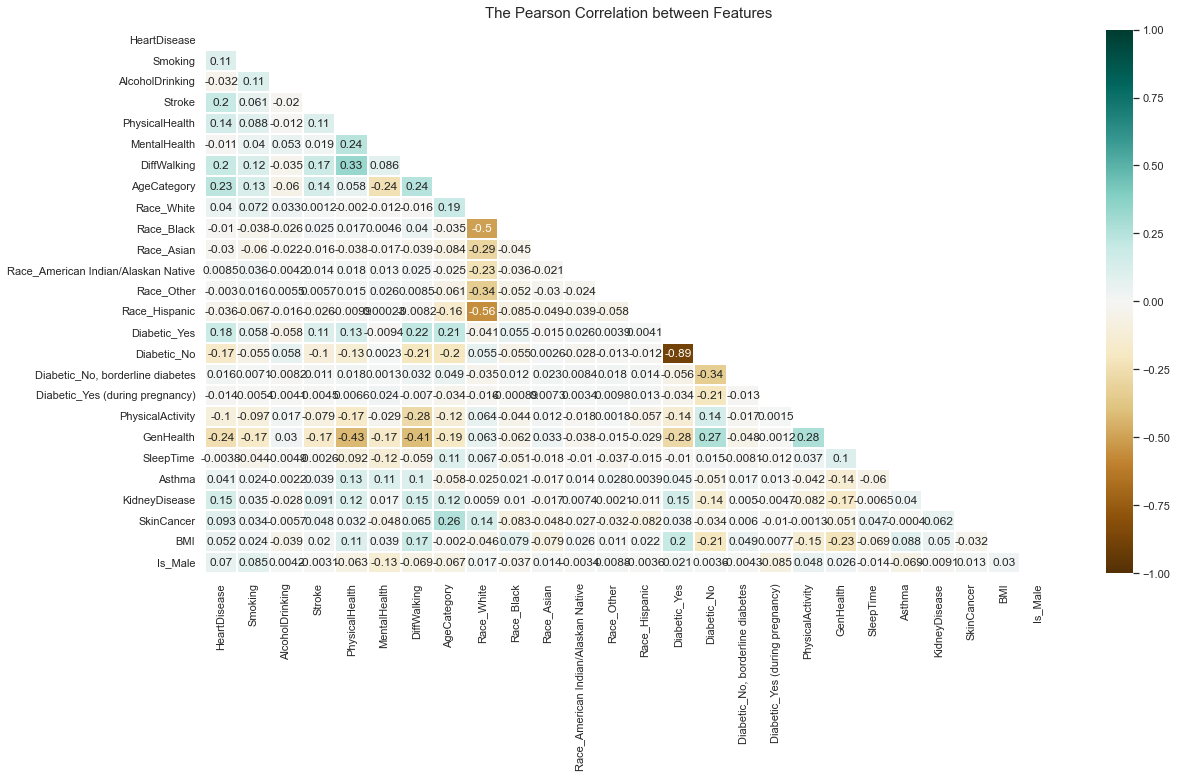

In [ ]:
# Plotting the correlation Heatmap to find the correlation among the features.
data_corr = t_df.corr()
mask = np.triu(np.ones_like(t_df.corr(), dtype=bool))

corr_ft = plt.figure(figsize= (19, 10))
corr_ft = sns.heatmap(data_corr, mask=mask,vmin= -1, vmax = 1, annot=True, linewidths= 0.3, cmap= "BrBG")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)

plt.show()

#### Observations on Removing Mullticollinear features: 
1. There seems multicollinearity exists among some of the features like `PhysicalHealth, MentalHealth, DiffWalking` with `GenHealth`, as if teh adults are suffering with physical illness or mental illness for many days their genHealth will be poor and adults find with difficult with Walking are not very good in their health condition.
2. `DiffWalking` also has significant negative correlation with `PhysicalAcitivity`, as expected adults who are regularly doing physical activity wont find any difficulty in walking as they will be active.
3. Some of our Race features are correlated with other Race features, so lets consider only Race_white as it has high weightage compare to other race features with Target.
4. `Diabetic_Yes` and `Diabetic_No` are highly negatively correlated as both are very realted, so lets consider `Diabetic_Yes`. `Diabetic_Yes` is again correlated with GenHealth, so lets confirm the multicollinearity using VIF or OLS methods.

In [ ]:
# These are the features which are independent of each other and will be using these features for further work.
imp_feats = ['HeartDisease', "SleepTime", 'AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']

df_cleaned = t_df[imp_feats].copy()
df_cleaned.head()

,HeartDisease,SleepTime,AgeCategory,Stroke,Diabetic_Yes,KidneyDisease,Smoking,SkinCancer,Is_Male,BMI,Asthma,Race_White,AlcoholDrinking,GenHealth
0,0,0.250,7,0,1.0,0,1,1,0,0,1,1.0,0,3
1,0,0.500,12,1,0.0,0,0,0,0,1,0,1.0,0,3
2,0,0.625,9,0,1.0,0,1,0,1,2,1,1.0,0,1
3,0,0.375,11,0,0.0,0,0,1,0,1,0,1.0,0,2
4,0,0.625,4,0,0.0,0,0,0,0,1,0,1.0,0,3


### Going futher in this notebook, will be using the above cleaned, Encoded, Standardized data for better model building.

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


df = df_cleaned.copy()

Target = "SleepTime"
selected_feats = df.columns.tolist()

selected_feats.remove(Target)
selected_feats

X = df[selected_feats].copy()
y = df[Target].copy()

# Creating Test(75%), Train(15%), Validation(10%) sets
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t,  test_size=0.10)


In [ ]:
# Defining a function to calculate feature coefficients with p-values using ols method.
import statsmodels.api as sm

def cal_OLS_summary(t_df, target):
    col = t_df.columns.tolist()
    col.remove(target)
    col

    model = sm.OLS(t_df[target], t_df[col]).fit()
    # Print out the statistics
    return model.summary()

In [ ]:
summary = cal_OLS_summary(df_cleaned, "SleepTime")
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SleepTime   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                          1.989e+05
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:42:18   Log-Likelihood:                      1.0207e+05
No. Observations:              319795   AIC:                                 -2.041e+05
Df Residuals:                  319782   BIC:                                 -2.040e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
HeartDisease        0.0140      0.001     11.684      0.000       0.012       0.016
AgeCategory         0.0164   8.99e-05    182.970      0.000       0.016       0.017
Stroke              0.0327      0.002     19.407      0.000       0.029       0.036
Diabetic_Yes        0.0204      0.001     20.267      0.000       0.018       0.022
KidneyDisease       0.0316      0.002     18.626      0.000       0.028       0.035
Smoking             0.0201      0.001     31.157      0.000       0.019       0.021
SkinCancer         -0.0084      0.001     -7.508      0.000      -0.011      -0.006
Is_Male             0.0295      0.001     47.383      0.000       0.028       0.031
BMI                 0.0367      0.000    150.061      0.000       0.036       0.037
Asthma              0.0302      0.001     32.992      0.000       0.028       0.032
Race_White          0.0665      0.001     90.068      0.000       0.065       0.068
AlcoholDrinking     0.0216      0.001     17.356      0.000       0.019       0.024
GenHealth           0.0841      0.000    354.544      0.000       0.084       0.085
==============================================================================
Omnibus:                     2328.546   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3371.656
Skew:                           0.076   Prob(JB):                         0.00
Kurtosis:                       3.479   Cond. No.                         44.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we are predicting the SleepTime, it is not that critical so will be looking at 5% significance level.
## Inference on Linear Model Coefficients:
Looking the above summary clearly, 
1. As we already removed collinear features, OLS signifies all the selected features are significant to predict the SleepTime.
2. `GenHealth (General Health) has very high positive impact on Sleep Time` which seems to be `realistic`, and followed by AgeCategory and BMI.
3. `SkinCancer` has `negative impact` on `SleepTime`. 
4. Diabetic people has positive impact on SleepTime, which signifies that diabetic people sleep Quickly/more time, similarly White Race people, Asthma, Male_Gender,..
5. Further feature engineering will help us to find the best features with better coefficients to build a very robust model. [Feature Engineering in future notebook.]

In [ ]:
import shap
shap.initjs()
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [ ]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

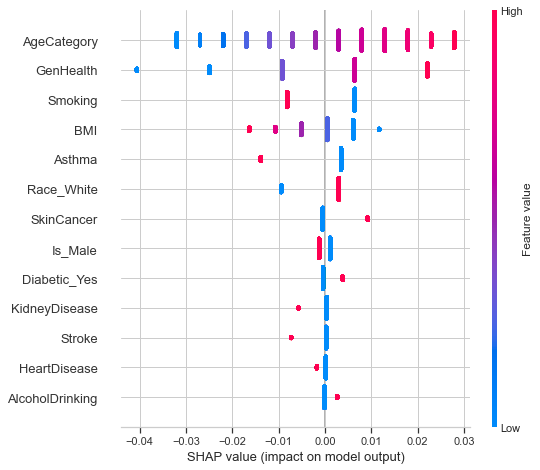

In [ ]:
shap.summary_plot(shap_values, X_test)

### Observations on Shap Analysis 
#### The above shap Analysis signifies - 
- As `Age` increases, the impact on the model is high and they tend to sleep more.
- Higher `BMI` shows low sleeping time which seems to be very realistic.
- If `GenHealth` is high/good they are having a positive impact on sleeping behaviour.
- Impact of `smokers and non smokers` has no high variation on target, however `people who smoke tend to sleep for less time` than the one who don't
- Strangely people with or with out `heart disease` show almost same impact on sleep which is questionable
- Critical Health issues such as HeartDisease, Kidney Disease, Stroke for atleast once, Asthma has negative impact on sleeping time but people with Diabetic and Skincancer has tend to have positive sleeping behaviour which seems little weird.
- As we tried linear model, few observations seems to be non-realistic so, lets compare these variable importance with non-linear models in furthur notebook.


## Question 2:
### Fit a tree-based model and interpret the nodes.

# <b> <span style='color:#0386f7de'>|</span> Abstract</b>

### The objective of this Notebook is to predict `HeartDisease` using all the Personal Key Indicators of the Human Beings with HeartDisease information.
* Dataset: Personal key indicators of HeartDisease.
* Dataset has 319795 observations and 18 features [14 Categorical features and 4 Continuous Features] with just 27,373 (8.5%) HeartDisease (Target) observations.

In [ ]:
df_cleaned.head()

,HeartDisease,SleepTime,AgeCategory,Stroke,Diabetic_Yes,KidneyDisease,Smoking,SkinCancer,Is_Male,BMI,Asthma,Race_White,AlcoholDrinking,GenHealth
0,0,0.250,7,0,1.0,0,1,1,0,0,1,1.0,0,3
1,0,0.500,12,1,0.0,0,0,0,0,1,0,1.0,0,3
2,0,0.625,9,0,1.0,0,1,0,1,2,1,1.0,0,1
3,0,0.375,11,0,0.0,0,0,1,0,1,0,1.0,0,2
4,0,0.625,4,0,0.0,0,0,0,0,1,0,1.0,0,3


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HeartDisease     319795 non-null  int64  
 1   SleepTime        319795 non-null  float64
 2   AgeCategory      319795 non-null  int32  
 3   Stroke           319795 non-null  int64  
 4   Diabetic_Yes     319795 non-null  float64
 5   KidneyDisease    319795 non-null  int64  
 6   Smoking          319795 non-null  int64  
 7   SkinCancer       319795 non-null  int64  
 8   Is_Male          319795 non-null  uint8  
 9   BMI              319795 non-null  int32  
 10  Asthma           319795 non-null  int64  
 11  Race_White       319795 non-null  float64
 12  AlcoholDrinking  319795 non-null  int64  
 13  GenHealth        319795 non-null  int32  
dtypes: float64(3), int32(3), int64(7), uint8(1)
memory usage: 28.4 MB


In [ ]:
df.head()

,HeartDisease,SleepTime,AgeCategory,Stroke,Diabetic_Yes,KidneyDisease,Smoking,SkinCancer,Is_Male,BMI,Asthma,Race_White,AlcoholDrinking,GenHealth
0,0,0.250,7,0,1.0,0,1,1,0,0,1,1.0,0,3
1,0,0.500,12,1,0.0,0,0,0,0,1,0,1.0,0,3
2,0,0.625,9,0,1.0,0,1,0,1,2,1,1.0,0,1
3,0,0.375,11,0,0.0,0,0,1,0,1,0,1.0,0,2
4,0,0.625,4,0,0.0,0,0,0,0,1,0,1.0,0,3


In [ ]:
100*df.HeartDisease.value_counts(normalize=True)

0    91.440454
1     8.559546
Name: HeartDisease, dtype: float64

#### Stratified Sampling is a sampling method that reduces the sampling error and it allows to create a test set with a population that best represents the entire population being studied.

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


df = df_cleaned.copy()

Target = "HeartDisease"
selected_feats = df.columns.tolist()

selected_feats.remove(Target)
selected_feats

X = df[selected_feats].copy()
y = df[Target].copy()


# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
    
# for train_index, test_index in sss.split(X, y):
#     X_t, X_test = X.loc[train_index], X.loc[test_index]
#     y_t, y_test = y.loc[train_index], y.loc[test_index]
    
# for i in 
    
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
    
# for t_index, te_index in sss.split(X_t, y_t):
#     X_train, X_val = X_t.loc[t_index], X.loc[te_index]
#     y_train, y_val = y_t.loc[t_index], y.loc[te_index]


# Creating Test(75%), Train(15%), Validation(10%) sets
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t,  test_size=0.10)


print('Checking the Data Distribution by stratified split...')
print('\nTarget Distribution in original dataset:')
print(100*df[Target].value_counts(normalize=True))

print('\nTarget Distribution in Train dataset:')
print(100*y_train.value_counts(normalize=True))

print('\nTarget Distribution in Test dataset:')
print(100*y_test.value_counts(normalize=True))


print('\nTarget Distribution in Validation dataset:')
print(100*y_val.value_counts(normalize=True))

Checking the Data Distribution by stratified split...

Target Distribution in original dataset:
0    91.440454
1     8.559546
Name: HeartDisease, dtype: float64

Target Distribution in Train dataset:
0    91.409488
1     8.590512
Name: HeartDisease, dtype: float64

Target Distribution in Test dataset:
0    91.630186
1     8.369814
Name: HeartDisease, dtype: float64

Target Distribution in Validation dataset:
0    91.384321
1     8.615679
Name: HeartDisease, dtype: float64


In [ ]:
parameters = {  
    'n_estimators': [24,28,32],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (5,10,15),     
    'criterion'   : ['gini', 'entropy'],
}
model = RandomForestClassifier()
gridsearch = GridSearchCV(estimator = model,     
                          param_grid = parameters, 
                          cv = 2,
                          n_jobs = -1,
                          return_train_score = False,
                          scoring = "accuracy"      
                         )
gridsearch.fit(X_train, y_train)

print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))

Best params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 24}
Best Score: 0.9153497764079758


In [ ]:
forest = RandomForestClassifier(n_estimators=28, max_depth=10, max_features='sqrt',criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=28, random_state=0)

In [ ]:
print(f"Model Score on Training Data: {forest.score(X_train,y_train)}")
print(f"Model Score on Test Data: {forest.score(X_test,y_test)}")
print(f"Model Score on Validation Data: {forest.score(X_val, y_val)}")

Model Score on Training Data: 0.9175039445393677
Model Score on Test Data: 0.917281634354805
Model Score on Validation Data: 0.9150204171724975


### Model Performance is very stable across all the sets (`Train, Test and Valiadtion` sets) and this is the best model so far.

<BarContainer object of 13 artists>

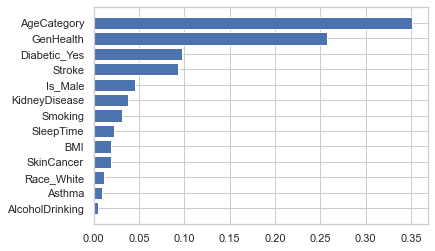

In [ ]:
sorted_idx = forest.feature_importances_.argsort()
sorted_idx
features = X_train.columns.tolist()
result = sorted(zip(features, forest.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

## Observations:

* Above charts shows the variable important in descending order.
* Age category, General health, Diabetic_YES, Stroke and KidneyDisease are the significant important features to predict the Heart Disease.
* It is strange that `BMI` is `not` among the `TOP important features`.
* If closely observed, `Health related issues like Diabetic, Stroke, Kidney Disease` are the very important features and people suffered with such issues have high chances of getting heart Disease followed by `AGE, Gender and Smoking`.
* Let's try to understand the behaviour using the Shap Values.

In [ ]:
# !pip install shap

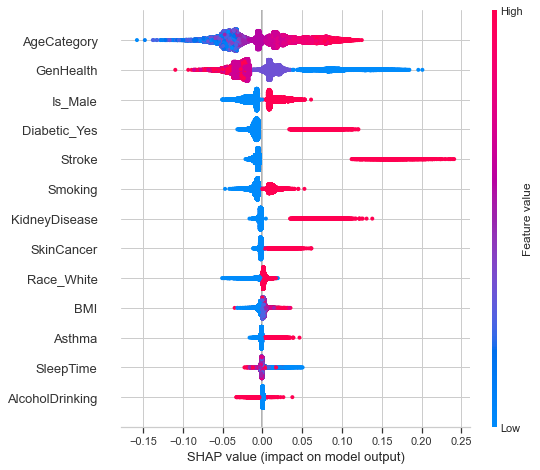

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(forest)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

## Observations on SHAP values:

* As expected, with `increase in Age`, the `chances of getting HeartDisease are also High` compare to younger people
* GenHealth `(General Health) shows very realastic trend` that if `someones general health is poor/bad`, they are `high prone to Heart Disease`
* `Male_Gender, Smoking, BMI, Asthma` follows the same trend, if they are `Male / have smoking habit / has high BMI value / has Asthma problem`, they are `highly prone` to diagonsed with Heart Disease.
* It is `interesting behaviour about AlcholDrinking habit`, irrespective of `whether one drink or not`, `few cannot escape from diagnosed` with Heart Disease.
* If the `Average Sleep Time per day is Low`, then there are `high chances of facing Heart Disease`.
* As we infered from model feature importance, if `someone is facing critical Health issues` then they are `highly prone to HeartDisease`.
#### All these observations are algined with the above RandomForest model variable importance.


## Question 3:
### Use auto ml to find the best model.
# <b> <span style='color:#0386f7de'>|</span> Abstract</b>

### The objective of this Notebook is to predict `HeartDisease` using AutoML
* Dataset: Personal key indicators of HeartDisease.
* Dataset has 319795 observations and 18 features [14 Categorical features and 4 Continuous Features] with just 27,373 (8.5%) HeartDisease (Target) observations.

In [7]:
# !apt-get install default-jre
!java -version
# Installing H2O
# !pip install h2o

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [9]:
# Importing required packages
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML

In [10]:
# Initilazing h20 instance
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkfz53n7l
  JVM stdout: /tmp/tmpkfz53n7l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkfz53n7l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54325
Connecting to H2O server at http://127.0.0.1:54325 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_pqt740
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# <b> <span style='color:#0386f7de'>|</span> Importing the Dataset</b>

In [11]:
# Dataset Link
data_githublink = "https://github.com/jkkn31/KrishnakanthNaik/blob/main/heart_2020_cleaned.csv"

# Transforming above link to access data from above provided github link
data_githublink= data_githublink.replace("blob/", "").replace("github.com","raw.githubusercontent.com")
data_githublink

# Importing the data from github into h20 dataframe
df = h2o.import_file(data_githublink)
# Changing the HeartDisease feature as object.
df["HeartDisease"] = df["HeartDisease"].asfactor()
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.6,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [12]:
# Checking the data types
df.types

{'HeartDisease': 'enum',
 'BMI': 'real',
 'Smoking': 'enum',
 'AlcoholDrinking': 'enum',
 'Stroke': 'enum',
 'PhysicalHealth': 'int',
 'MentalHealth': 'int',
 'DiffWalking': 'enum',
 'Sex': 'enum',
 'AgeCategory': 'enum',
 'Race': 'enum',
 'Diabetic': 'enum',
 'PhysicalActivity': 'enum',
 'GenHealth': 'enum',
 'SleepTime': 'int',
 'Asthma': 'enum',
 'KidneyDisease': 'enum',
 'SkinCancer': 'enum'}

In [13]:
# Checking the Descriptive Statistics of data
df.describe()

Rows:319795
Cols:18

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
type,enum,real,enum,enum,enum,int,int,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum
mins,,12.02,,,,0.0,0.0,,,,,,,,1.0,,,
mean,,28.325398520927447,,,,3.3717100017198582,3.8983661408089545,,,,,,,,7.097074688472302,,,
maxs,,94.85,,,,30.0,30.0,,,,,,,,24.0,,,
sigma,,6.356100200470739,,,,7.950850182571358,7.955235218943607,,,,,,,,1.4360070609642828,,,
zeros,,0,,,,226589,205401,,,,,,,,0,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [14]:
# Splitting the dataset into Train, Test, Validation.
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

# Selecting the Target and input features.
y = "HeartDisease"
x = df.columns
x.remove(y)

In [15]:
# Initiating the model with maximum 0f 10 and excluding stackedensemble and deeplearning model while training.
# As we already have validation data, so keeping n_folds as 0 so that model wont be using cross validation while training.
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [16]:
# Training the model with training dataset and validating with the validation dataset.
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
04:33:54.453: Project: AutoML_1_20221206_43354
04:33:54.455: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:33:54.455: Setting stopping tolerance adaptively based on the training frame: 0.002113008270324216
04:33:54.455: Build control seed: 10
04:33:54.456: training frame: Frame key: AutoML_1_20221206_43354_training_py_6_sid_8738    cols: 18    rows: 223974  chunks: 8    size: 2384885  checksum: 7740382520864874017
04:33:54.456: validation frame: Frame key: py_8_sid_8738    cols: 18    rows: 47899  chunks: 8    size: 574272  checksum: 7293820062921925683
04:33:54.457: leaderboard frame: Frame key: py_8_sid_8738    cols: 18    rows: 47899  chunks: 8    size: 574272  checksum: 7293820062921925683
04:33:54.457: blending frame: NULL
04:33:54.457: response column: HeartDisease
04:33:54.457: fold column: null
04:33:54.457: weights column: null
04:33:54.480: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20221206_43354


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          84412                  7            7            7             41            127           107.433

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06198518457018138
RMSE: 0.2489682400833114
LogLoss: 0.21497869160362626
Mean Per-Class Error: 0.28807200997589066
AUC: 0.8588718703771265
AUCPR: 0.42136865204736745
Gini: 0.7177437407542531

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22234480104982512
       No      Yes    Error    Rate
-----  ------  -----  -------  ------------------
No     189014  15863  0.0774   (15863.0/204877.0)
Yes    9524    9573   0.4987   (9524.0/19097.0)
Total  198538  25436  0.1133   (25387.0/223974.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.222345     0.429928  191
max f2                       0.107918     0.540972  273
max f0point5                 0.344686     0.449422  126
max accuracy                 0.445026     0.921098  88
max precision                0.8957       1         0
max recall                   0.00398503   1         399
max specificity              0.8957       1         0
max absolute_mcc             0.208681     0.373277  199
max min_per_class_accuracy   0.103184     0.775096  277
max mean_per_class_accuracy  0.0832529    0.777932  294
max tns                      0.8957       204877    0
max fns                      0.8957       19093     0
max fps                      0.00398503   204877    399
max tps                      0.00398503   19097     399
max tnr                      0.8957       1         0
max fnr                      0.8957       0.999791  0
max fpr                      0.00398503   1         399
max tpr                      0.00398503   1         399

Gains/Lift Table: Avg response rate:  8.53 %, avg score:  8.53 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100012                   0.545496           8.82235    8.82235            0.752232         0.630442    0.752232                    0.630442            0.0882338       0.0882338                  782.235   782.235            0.0855248
2        0.0200023                   0.460435           6.59713    7.70974            0.5625           0.500107    0.657366                    0.565274            0.0659789       0.154213                   559.713   670.974            0.14672
3        0.0300035                   0.40565            5.58138    7.00029            0.475893         0.432143    0.596875                    0.520897            0.0558203       0.210033                   458.138   600.029            0.19681
4        0.0400002                   0.367004           4.65672    6.41459            0.397052         0.385311    0.546936                    0.487012            0.0465518       0.256585                   365.672   541.459            0.236773
5        0.0500013                   0.336743           4.35096    6.00183            0.370982         0.351

In [ ]:
# Checking the models leaderboard
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_4_20221107_224154,0.844158,0.227216,0.364443,0.289917,0.25667,0.0658795
GBM_2_AutoML_4_20221107_224154,0.843113,0.227688,0.362993,0.302014,0.256901,0.0659981
GBM_3_AutoML_4_20221107_224154,0.842291,0.228382,0.355701,0.298806,0.257368,0.0662383
GBM_grid_1_AutoML_4_20221107_224154_model_1,0.842222,0.228586,0.361122,0.299617,0.257129,0.0661152
GBM_4_AutoML_4_20221107_224154,0.839599,0.2302,0.347188,0.316287,0.258563,0.066855
GLM_1_AutoML_4_20221107_224154,0.839572,0.229641,0.358474,0.296314,0.257589,0.0663519
GBM_1_AutoML_4_20221107_224154,0.838617,0.230158,0.350041,0.294437,0.258209,0.0666718
XRT_1_AutoML_4_20221107_224154,0.835571,0.234274,0.345385,0.280819,0.25955,0.0673664
DRF_1_AutoML_4_20221107_224154,0.829246,0.236162,0.327571,0.301658,0.260989,0.0681154
GBM_grid_1_AutoML_4_20221107_224154_model_2,0.822795,0.240579,0.316735,0.314011,0.262974,0.0691555


In [ ]:
# Predict the output on test data by using best model from leaderboard
df_test_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Checking the model performance on Test Dataset
aml.leader.model_performance(df_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06502713437691544
RMSE: 0.25500418501843347
LogLoss: 0.2241705816689011
Mean Per-Class Error: 0.290283275434837
AUC: 0.8446570223846849
AUCPR: 0.3431523272324154
Gini: 0.6893140447693697

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19786718577963205
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     39435  4404   0.1005   (4404.0/43839.0)
Yes    1955   2117   0.4801   (1955.0/4072.0)
Total  41390  6521   0.1327   (6359.0/47911.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.197867     0.399698  200
max f2                       0.0965772    0.527268  276
max f0point5                 0.302434     0.393899  139
max accuracy                 0.49924      0.916136  61
max precision                0.787552     0.736842  6
max recall                   0.00498349   1         398
max specificity              0.999946     0.999977  0
max absolute_mcc             0.153553     0.347807  230
max min_per_class_accuracy   0.0985881    0.766874  274
max mean_per_class_accuracy  0.0802988    0.770274  292
max tns                      0.999946     43838     0
max fns                      0.999946     4072      0
max fps                      0.00459726   43839     399
max tps                      0.00498349   4072      398
max tnr                      0.999946     0.999977  0
max fnr                      0.999946     1         0
max fpr                      0.00459726   1         399
max tpr                      0.00498349   1         398

Gains/Lift Table: Avg response rate:  8.50 %, avg score:  8.50 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100186                   0.523744           6.34872    6.34872            0.539583         0.612298    0.539583                    0.612298            0.0636051       0.0636051                  534.872   534.872            0.0585639
2        0.0200163                   0.448618           5.79701    6.07315            0.492693         0.48266     0.516163                    0.547547            0.0579568       0.121562                   479.701   507.315            0.110978
3        0.030014                    0.398833           4.66708    5.60479            0.39666          0.421735    0.476356                    0.505639            0.0466601       0.168222                   366.708   460.479            0.151046
4        0.0400117                   0.362914           4.86359    5.41959            0.413361         0.380151    0.460616                    0.474283            0.0486248       0.216847                   386.359   441.959            0.19326
5        0.0500094                   0.33348            4.15125    5.16602            0.352818         0.347751    0.439065                    0.448987            0.0415029       0.25835                    315.125   416.602            0.227692
6        0.100019                    0.238907           3.33925    4.25264            0.283806         0.282019    0.361436                    0.365503            0.166994        0.425344                   233.925   325.264            0.355543
7        0.150007                    0.183721           2.45636    3.65405            0.208768         0.209917    0.310561                    0.313656            0.12279         0.548134                   145.636   265.405            0.435

In [18]:
best_model = aml.leader
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20221206_43354


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          84412                  7            7            7             41            127           107.433

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06198518457018138
RMSE: 0.2489682400833114
LogLoss: 0.21497869160362626
Mean Per-Class Error: 0.28807200997589066
AUC: 0.8588718703771265
AUCPR: 0.42136865204736745
Gini: 0.7177437407542531

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22234480104982512
       No      Yes    Error    Rate
-----  ------  -----  -------  --------------

In [ ]:
best_model.get_params()

{'model_id': None,
 'training_frame': None,
 'validation_frame': None,
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'auto',
 'fold_column': None,
 'response_column': None,
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 50,
 'max_depth': 5,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': None,
 'stopping_rounds': 0,
 'stopping_metric': 'auto',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': -1,
 'build_tree_one_node': False,
 'learn_rate': 0.1,
 'learn_rate_annealing': 1.0,
 'distribution': 'auto',
 'quantile_alpha': 0.5,
 'tweedie_power': 1.5,
 'huber_alp

# <b><span style='color:#0386f7de'>|</span> Model Performance Summary</b>

#### ModelMetricsBinomial: gbm ** Reported on train data. **

* MSE: 0.0631198111083697
* RMSE: 0.25123656403551153
* LogLoss: 0.21853579997981482
* Mean Per-Class Error: 0.28138093777627604
* AUC: 0.8533219379169816
* AUCPR: 0.3978853016394608
* Gini: 0.7066438758339633


#### ModelMetricsBinomial: gbm ** Reported on validation data. **

ModelMetricsBinomial: gbm
** Reported on validation data. **

* MSE: 0.06526510878341328
* RMSE: 0.2554703677208245
* LogLoss: 0.22495188544853698
* Mean Per-Class Error: 0.2720072248203161
* AUC: 0.8443769644816137
* AUCPR: 0.35078232300088874
* Gini: 0.6887539289632274



* MSE: 0.06587949498687647
* RMSE: 0.2566700118573973
* LogLoss: 0.22721583517466343
* Mean Per-Class Error: 0.2899165118993879
* AUC: 0.8441578514842767
* AUCPR: 0.3644434476299326
* Gini: 0.6883157029685534

#### ModelMetricsBinomial: gbm ** Reported on test data. **

* MSE: 0.06502713437691544
* RMSE: 0.25500418501843347
* LogLoss: 0.2241705816689011
* Mean Per-Class Error: 0.290283275434837
* AUC: 0.8446570223846849
* AUCPR: 0.3431523272324154
* Gini: 0.6893140447693697



### If you clearly observe the metrics across the datasets (Train, Test, Validation) -- the errors are pretty low and all the errors are very stable and no comparable difference for all the datasets. 
#### AUC is ~84% for all the datasets, which signfies model differentiate the classes by 84%, which is a very good AUC score.



* Metrics across different datasets indicates model is not overfitting or underfitting for the data.
* Model is able to perform very good for any kind of datasets.

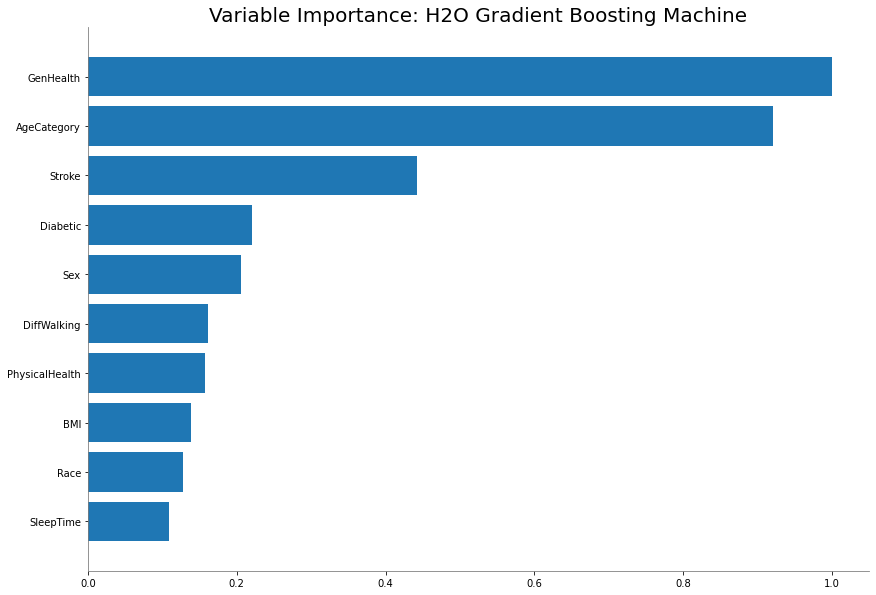

<Figure size 432x288 with 0 Axes>

In [19]:
best_model.varimp_plot()

### Variable Importance Chart:
* Above charts shows the important features in descending order.
* Age category, General health, Stroke, Diabetic are very important features to predict the SleepTime.

## Lets look at the overall SHAP Analysis:

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_1_20221206_43354

,No,Yes,Error,Rate
No,189014.0,15863.0,0.0774,(15863.0/204877.0)
Yes,9524.0,9573.0,0.4987,(9524.0/19097.0)
Total,198538.0,25436.0,0.1133,(25387.0/223974.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

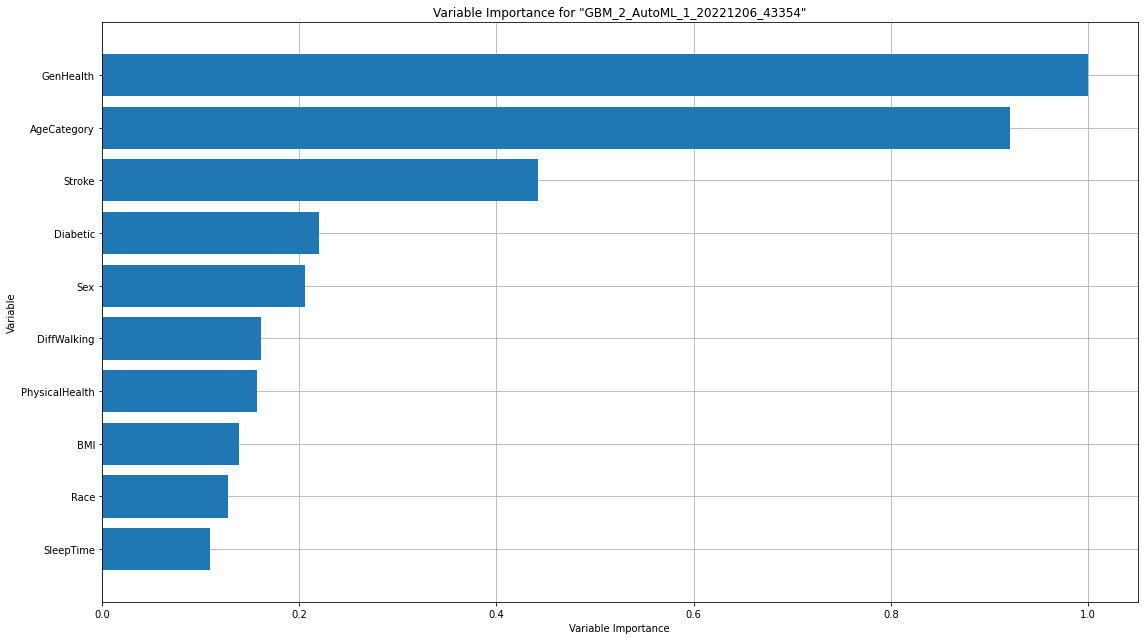

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

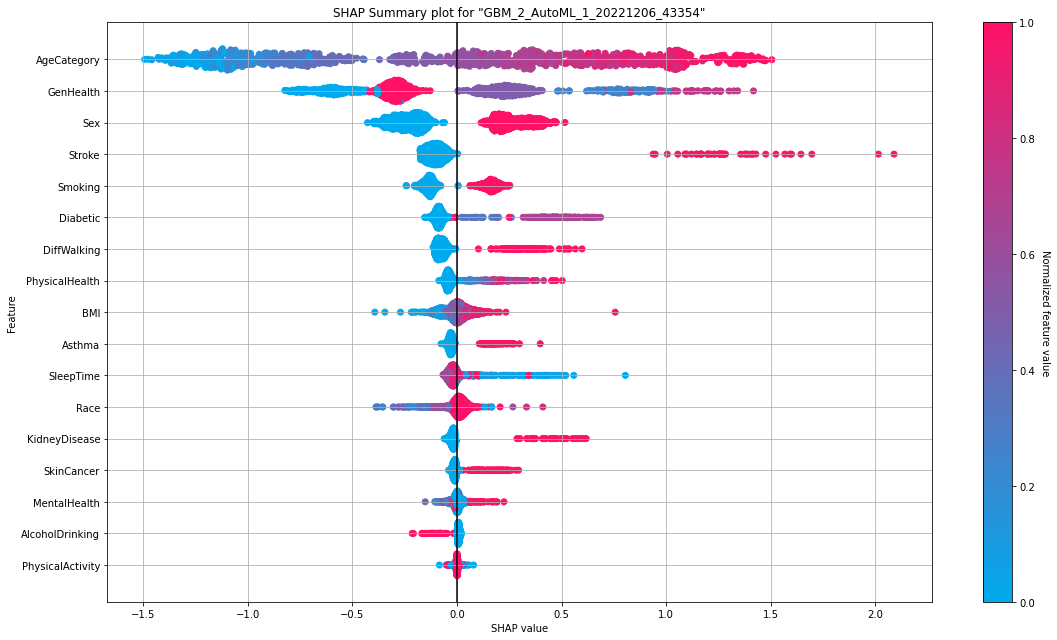

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

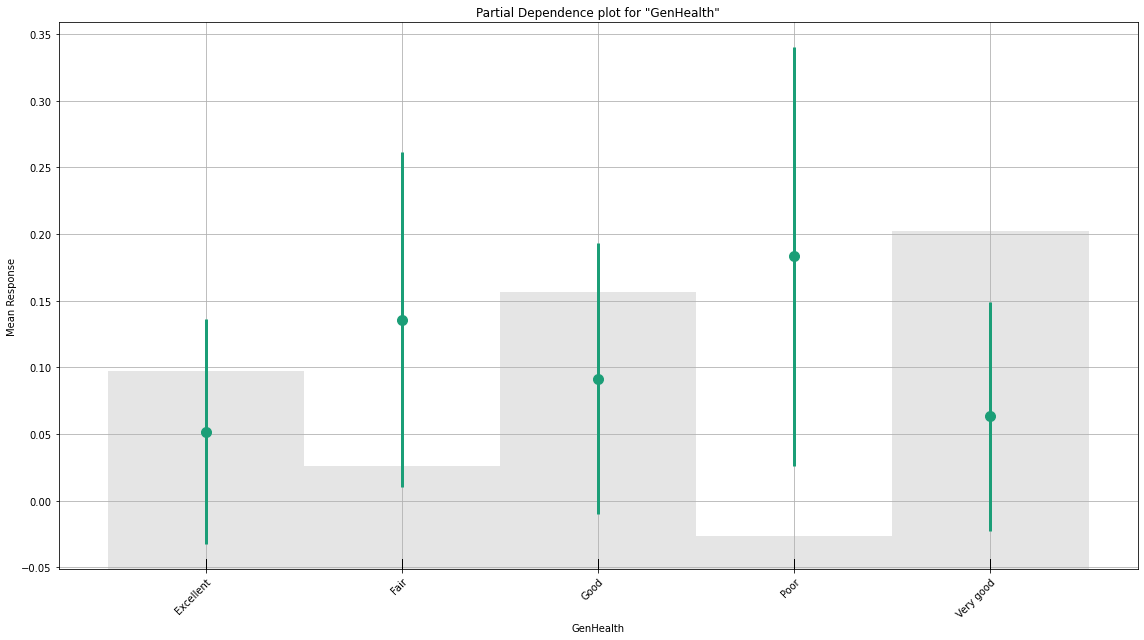

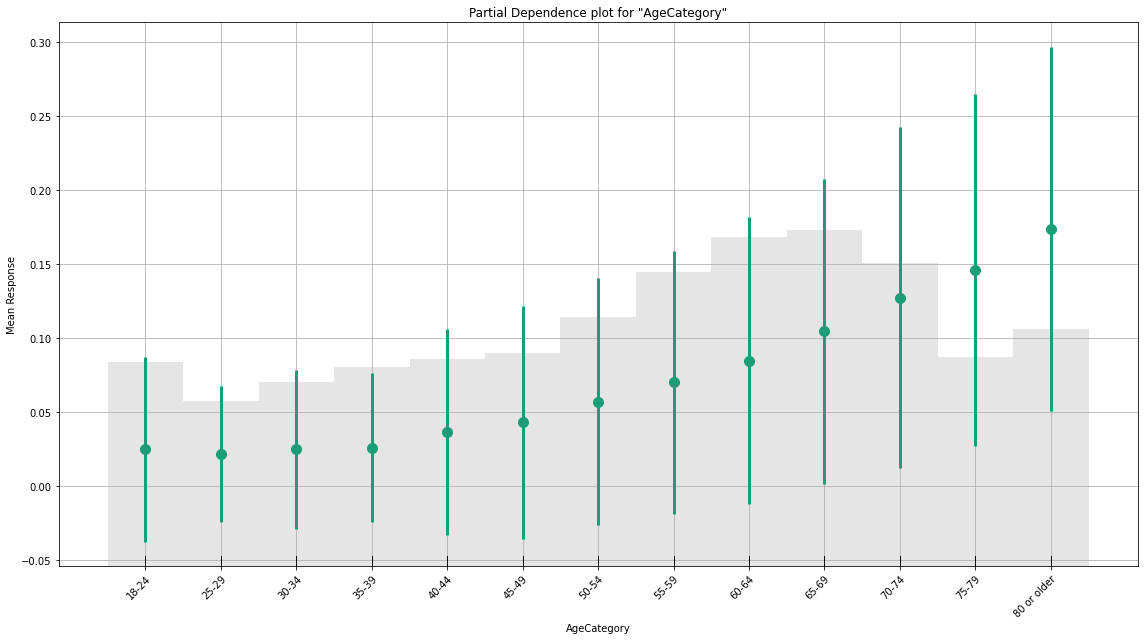

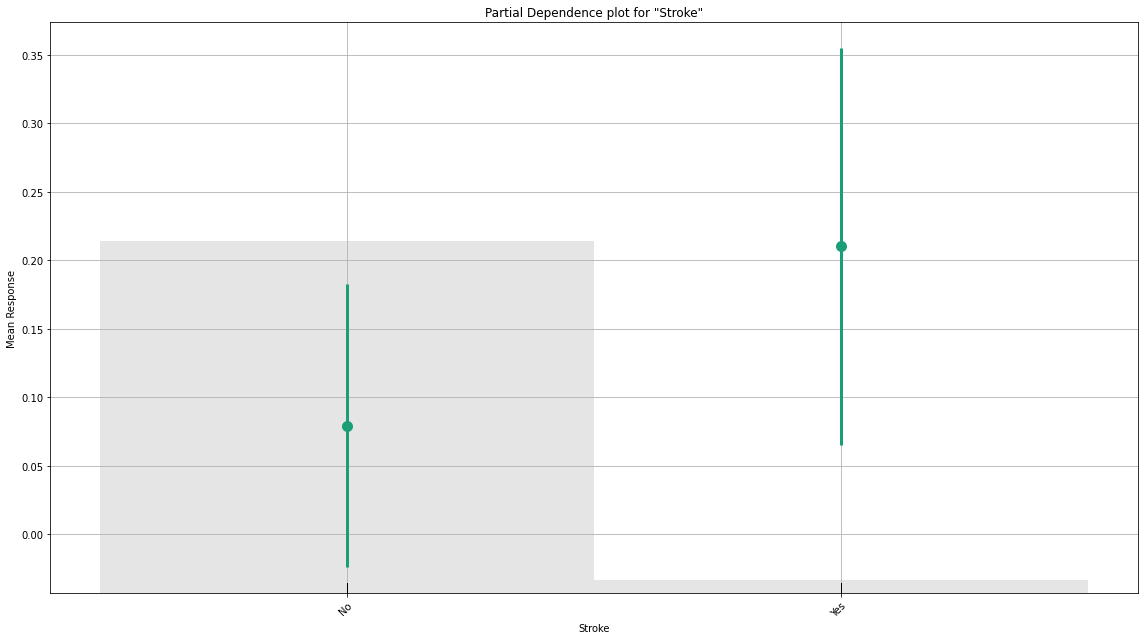

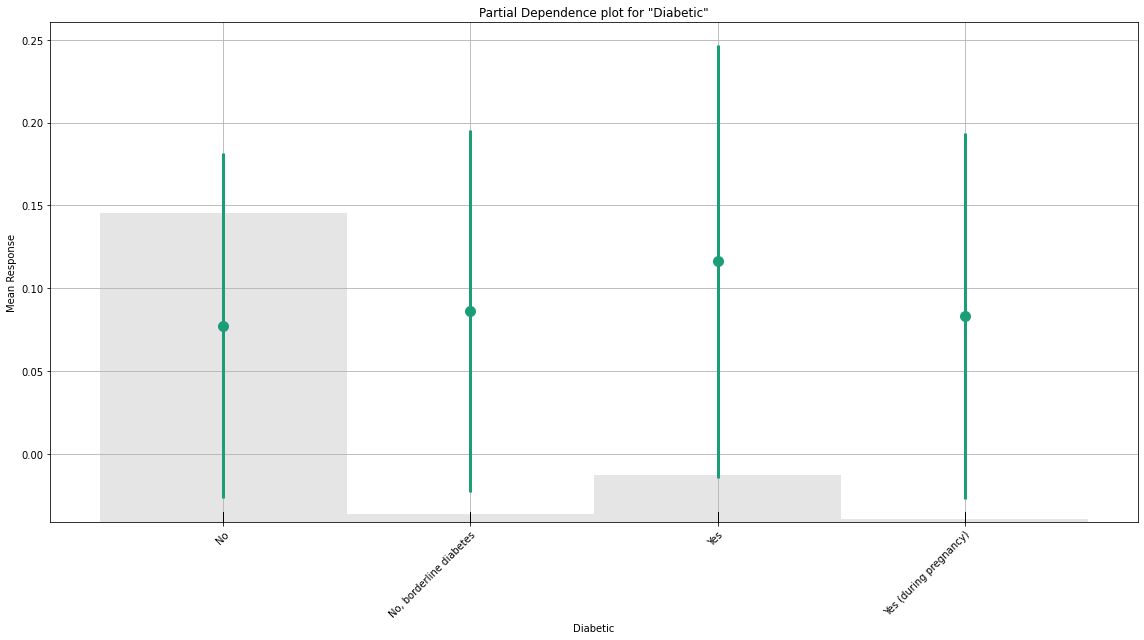

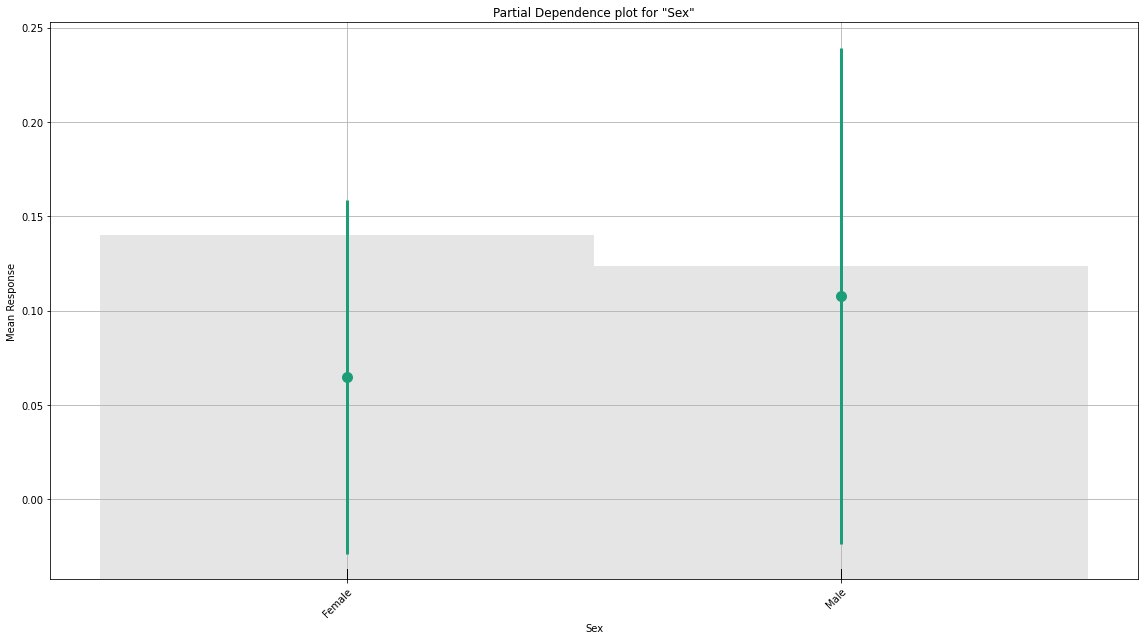

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_1_20221206_43354

,No,Yes,Error,Rate
No,189014.0,15863.0,0.0774,(15863.0/204877.0)
Yes,9524.0,9573.0,0.4987,(9524.0/19097.0)
Total,198538.0,25436.0,0.1133,(25387.0/223974.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [17]:
aml.leader.explain(df_train)

## Observations on SHAP values:

* As expected, with `increase in Age`, the `chances of getting HeartDisease are also High` compare to younger people
* GenHealth `(General Health) shows very realastic trend` that if `someones general health is poor/bad`, they are `high prone to Heart Disease`
* `Male_Gender, Smoking, BMI, Asthma` follows the same trend, if they are `Male / have smoking habit / has high BMI value / has Asthma problem`, they are `highly prone` to diagonsed with Heart Disease.
* It is `interesting behaviour about AlcholDrinking habit`, irrespective of `whether one drink or not`, `few cannot escape from diagnosed` with Heart Disease.
* If the `Average Sleep Time per day is Low`, then there are `high chances of facing Heart Disease`.
* As we infered from model feature importance, if `someone is facing critical Health issues` then they are `highly prone to HeartDisease`.
#### All these observations are algined with the above RandomForest model variable importance.


Lets Look at SHAP Analysis on a single row.

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,No,Yes
GBM_2_AutoML_1_20221206_43354,0.840628,0.229017,0.349831,0.284234,0.257709,0.0664141,18452,0.021657,GBM,No,0.876857,0.123143
GBM_3_AutoML_1_20221206_43354,0.839765,0.229595,0.346038,0.301672,0.258054,0.066592,18199,0.02364,GBM,No,0.906163,0.0938375
XGBoost_3_AutoML_1_20221206_43354,0.838919,0.229724,0.348757,0.293483,0.25803,0.0665796,29739,0.004491,XGBoost,No,0.848183,0.151817
GLM_1_AutoML_1_20221206_43354,0.838168,0.230137,0.352678,0.305556,0.257902,0.0665135,25424,0.002513,GLM,No,0.840052,0.159948
GBM_1_AutoML_1_20221206_43354,0.836775,0.230843,0.345127,0.294545,0.258457,0.0668001,31693,0.037546,GBM,No,0.877532,0.122468
GBM_4_AutoML_1_20221206_43354,0.836203,0.232079,0.334073,0.289556,0.259603,0.0673938,20731,0.034133,GBM,No,0.864754,0.135246
XGBoost_2_AutoML_1_20221206_43354,0.832607,0.23446,0.3256,0.289376,0.260824,0.0680291,43218,0.008674,XGBoost,No,0.915916,0.084084
XRT_1_AutoML_1_20221206_43354,0.830196,0.237332,0.330449,0.2791,0.260922,0.0680804,46270,0.029209,DRF,No,0.885788,0.114212
XGBoost_1_AutoML_1_20221206_43354,0.826573,0.238917,0.31028,0.292596,0.263466,0.0694141,65360,0.008899,XGBoost,No,0.905707,0.0942926
DRF_1_AutoML_1_20221206_43354,0.823212,0.239986,0.315834,0.302984,0.26203,0.0686598,51240,0.053995,DRF,No,0.905846,0.0941542


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

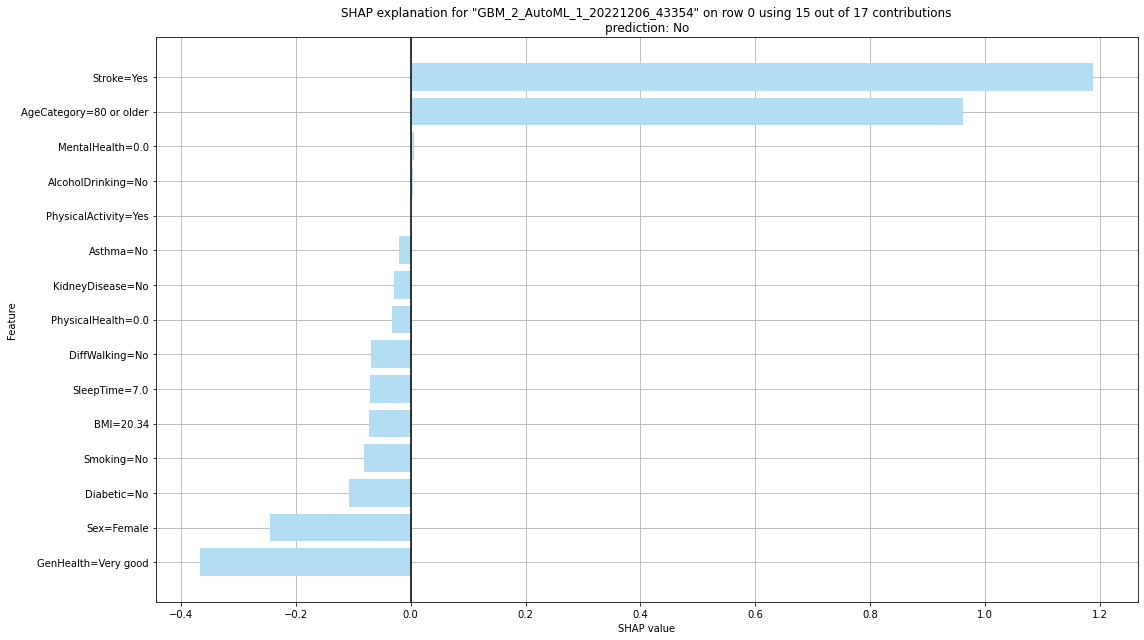

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,No,Yes
GBM_2_AutoML_1_20221206_43354,0.840628,0.229017,0.349831,0.284234,0.257709,0.0664141,18452,0.021657,GBM,No,0.876857,0.123143
GBM_3_AutoML_1_20221206_43354,0.839765,0.229595,0.346038,0.301672,0.258054,0.066592,18199,0.02364,GBM,No,0.906163,0.0938375
XGBoost_3_AutoML_1_20221206_43354,0.838919,0.229724,0.348757,0.293483,0.25803,0.0665796,29739,0.004491,XGBoost,No,0.848183,0.151817
GLM_1_AutoML_1_20221206_43354,0.838168,0.230137,0.352678,0.305556,0.257902,0.0665135,25424,0.002513,GLM,No,0.840052,0.159948
GBM_1_AutoML_1_20221206_43354,0.836775,0.230843,0.345127,0.294545,0.258457,0.0668001,31693,0.037546,GBM,No,0.877532,0.122468
GBM_4_AutoML_1_20221206_43354,0.836203,0.232079,0.334073,0.289556,0.259603,0.0673938,20731,0.034133,GBM,No,0.864754,0.135246
XGBoost_2_AutoML_1_20221206_43354,0.832607,0.23446,0.3256,0.289376,0.260824,0.0680291,43218,0.008674,XGBoost,No,0.915916,0.084084
XRT_1_AutoML_1_20221206_43354,0.830196,0.237332,0.330449,0.2791,0.260922,0.0680804,46270,0.029209,DRF,No,0.885788,0.114212
XGBoost_1_AutoML_1_20221206_43354,0.826573,0.238917,0.31028,0.292596,0.263466,0.0694141,65360,0.008899,XGBoost,No,0.905707,0.0942926
DRF_1_AutoML_1_20221206_43354,0.823212,0.239986,0.315834,0.302984,0.26203,0.0686598,51240,0.053995,DRF,No,0.905846,0.0941542


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [21]:
aml.explain_row(df_test, row_index=0)

## Observation:
* As we see few of the features behave differently compare to overall level. 

### Conclusion:
* Above Dataset We have both numerical and categorical features and the numerical features have very extreme outliers.
* There are no missing data in the dataset.
* As the scales are different for each feature, but Automl do Standarize the features.
* As BMI_values are not seems to be making as their is no significant difference between adults with or without Heart Disease eventhough the BMI is very High, so I have created a BMI class which showed more realistic distribution.
* Model Performance Metrics are very good and very stable across test and validation sets, this shows the stability of the model to identify SleepTime.

### Refernces:
1. Scikit learn Documentation
2. Referred Medium Articles
3. Referred Analytics Vidhya Articles
4. Referred Towards Data Science Articles
5. Referred Kaggle Notebooks.
6. https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glm_h2oworld_demo.ipynb
7.https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glrm.census.labor.violations.ipynb
8.https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glrm.census.labor.violations.ipynb
9.https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glrm.walking.gait.ipynb
10. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
11.https://github.com/aiskunks/Skunks_Skool/tree/main/I2SL
12. permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
13. modeling is refered from scikit-learn logistic regression officiakl documentatio
14. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
15. Refered Kaggle contributions for oversampling
16. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
17. Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

**I have used python libraries to do I have developed my own functions to plot the charts, to compute required metrics, to calculate required information and Every single line of code was written by myself and not copied from anywhere. for Data Exploration, I have referred to few Towards Data Science, Kaggle, Analytics vidya articles and have developed my knowledge from it. For Feature Scaling, I rerferred to Analytics Vidya article to understand more about encoders.**

### Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.